In [30]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Data/Spotify.csv')  # Replace 'dataset.csv' with your actual dataset file
data.head()  # Check the first few rows to understand its structure


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [17]:
# Check for missing values and handle them
data.isnull().sum()

# Drop rows with missing values (if any)
data = data.dropna()

# Convert 'popularity' to numeric if necessary
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Check the dataset again after preprocessing
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


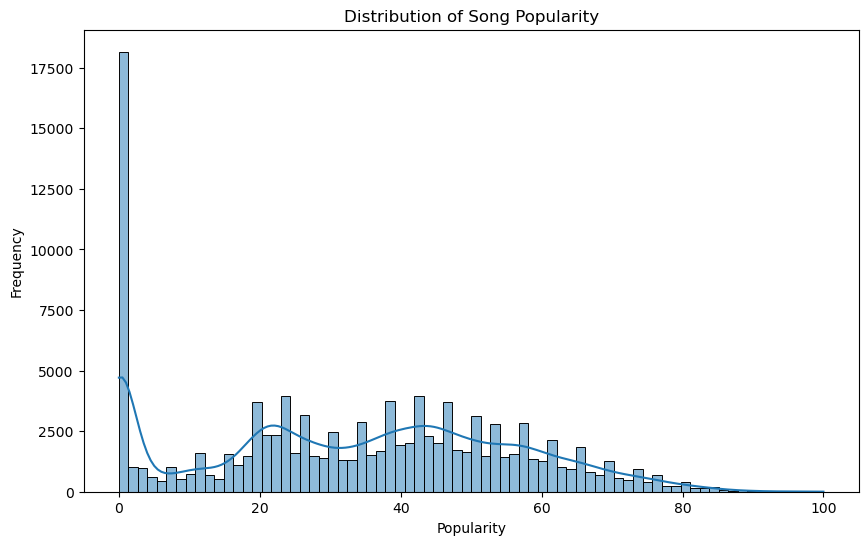

Number of unique artists: 31437
Number of unique tracks: 89740


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of popularity
plt.figure(figsize=(10,6))
sns.histplot(data['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Check the number of unique artists and tracks
print(f"Number of unique artists: {data['artists'].nunique()}")
print(f"Number of unique tracks: {data['track_id'].nunique()}")


In [19]:
import numpy as np

# Generate synthetic users
n_users = 1000  # Number of synthetic users
n_items = data.shape[0]  # Number of unique songs
user_ids = [f"user_{i}" for i in range(1, n_users + 1)]

# Create synthetic user interactions
interactions = []
for user in user_ids:
    sampled_tracks = data.sample(10)  # Each user interacts with 10 random tracks
    for _, track in sampled_tracks.iterrows():
        interactions.append({
            "user_id": user,
            "track_id": track["track_id"],
            "rating": track["popularity"]  # Use popularity as proxy for rating
        })

# Convert to DataFrame
interactions_df = pd.DataFrame(interactions)


In [20]:
from scipy.sparse import csr_matrix

# Create a user-item matrix
user_item_matrix = interactions_df.pivot(index='user_id', columns='track_id', values='rating').fillna(0)

# Convert to a sparse matrix for memory efficiency
sparse_user_item_matrix = csr_matrix(user_item_matrix.values)

# Check the shape of the matrix
user_item_matrix.shape


(1000, 9340)

In [21]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Prepare the data for Surprise
reader = Reader(rating_scale=(0, 100))  # Adjust scale to match popularity ratings
data_surprise = Dataset.load_from_df(interactions_df[['user_id', 'track_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data_surprise, test_size=0.2)


In [22]:
# Train an SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)


In [23]:
from surprise import accuracy

# Evaluate the model with RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 22.4705
RMSE: 22.470536121909362


In [29]:
# Step 1: Create a mapping of track_id to track_name
track_id_to_track_name = dict(zip(data['track_id'], data['track_name']))  # Mapping track_id to track_name

# Step 2: Function to recommend songs based on input track name
def recommend_songs_for_input_track(input_track_name, user_id):
    if input_track_name not in track_name_to_track_id:
        print("Track name not found!")
        return

    # Get the track_id corresponding to the input track name
    input_track_id = track_name_to_track_id[input_track_name]

    # Step 3: Generate predictions for all tracks for the given user (excluding the input track)
    user_predictions = []
    for track_id in all_tracks:
        if track_id != input_track_id:  # Exclude the input track from recommendations
            predicted_rating = model.predict(user_id, track_id).est
            track_name = track_id_to_track_name.get(track_id, "Unknown Song")  # Map track_id to track_name
            user_predictions.append((track_name, predicted_rating))

    # Step 4: Sort predictions by predicted rating (higher ratings first)
    top_recommendations = sorted(user_predictions, key=lambda x: x[1], reverse=True)[:10]

    # Step 5: Display the top 10 recommendations with track names
    print(f"Top 10 song recommendations for {user_id} based on '{input_track_name}':")
    for track_name, pred_rating in top_recommendations:
        print(f"Song: {track_name}, Predicted Rating: {pred_rating}")

# Example usage
input_track_name = 'Shape of You'  # Provide the track name you want to input
user_id = 'user_1'  # Specify the user ID

recommend_songs_for_input_track(input_track_name, user_id)


Top 10 song recommendations for user_1 based on 'Shape of You':
Song: Video Killed The Radio Star - Single Version, Predicted Rating: 61.9192077100084
Song: Run, Predicted Rating: 54.913541036481355
Song: Haven't Met You Yet, Predicted Rating: 45.78842865646832
Song: Comedy, Predicted Rating: 44.80853816602847
Song: Love Me Like You Do - From "Fifty Shades Of Grey", Predicted Rating: 44.80283575972961
Song: Promises (with Sam Smith), Predicted Rating: 44.73405147792046
Song: LAS 12, Predicted Rating: 44.229990180056774
Song: Remember That Night?, Predicted Rating: 43.00515714738779
Song: Budapest, Predicted Rating: 42.84435766352375
Song: 堕天, Predicted Rating: 42.6564739552183
